In [2]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pickle import dump

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

import seaborn as sns

from matplotlib import pyplot
from pickle import load

ModuleNotFoundError: No module named 'keras.api'

In [2]:
df_BTC = pd.read_csv('/Users/fuyihang/Desktop/blockchain_prediction/BTC2.csv',parse_dates=['time'])
df_ETH = pd.read_csv('/Users/fuyihang/Desktop/blockchain_prediction/ETH.csv')
df_LTC = pd.read_csv('/Users/fuyihang/Desktop/blockchain_prediction/LTC.csv')
df_XMR = pd.read_csv('/Users/fuyihang/Desktop/blockchain_prediction/XMR.csv')

In [3]:
df_LTC

,time,high,low,open,volumefrom,volumeto,close
0,2020-01-01,41.86,41.16,41.23,865174.51,35979677.49,41.59
1,2020-01-02,40.62,39.33,41.59,1093235.02,43124702.29,39.45
2,2020-01-03,42.36,41.05,39.45,1569007.78,66459103.79,42.36
3,2020-01-04,43.05,41.98,42.36,1542557.53,66053316.10,42.82
4,2020-01-05,43.81,42.33,42.82,1509666.70,65399855.29,43.32
...,...,...,...,...,...,...,...
1270,2023-06-24,93.78,86.45,91.32,310108.06,27885231.73,89.75
1271,2023-06-25,90.44,86.71,89.75,190488.51,16896461.77,88.26
1272,2023-06-26,90.33,85.86,88.26,283445.92,24821638.84,87.22
1273,2023-06-27,89.45,86.96,87.22,207498.33,18316215.54,88.08


In [6]:
coin_list = [df_BTC,df_ETH,df_LTC,df_XMR]
coin_name = ['Bitcoin', 'Ethereum', 'Litecoin', 'Monero']

Historical Close Price

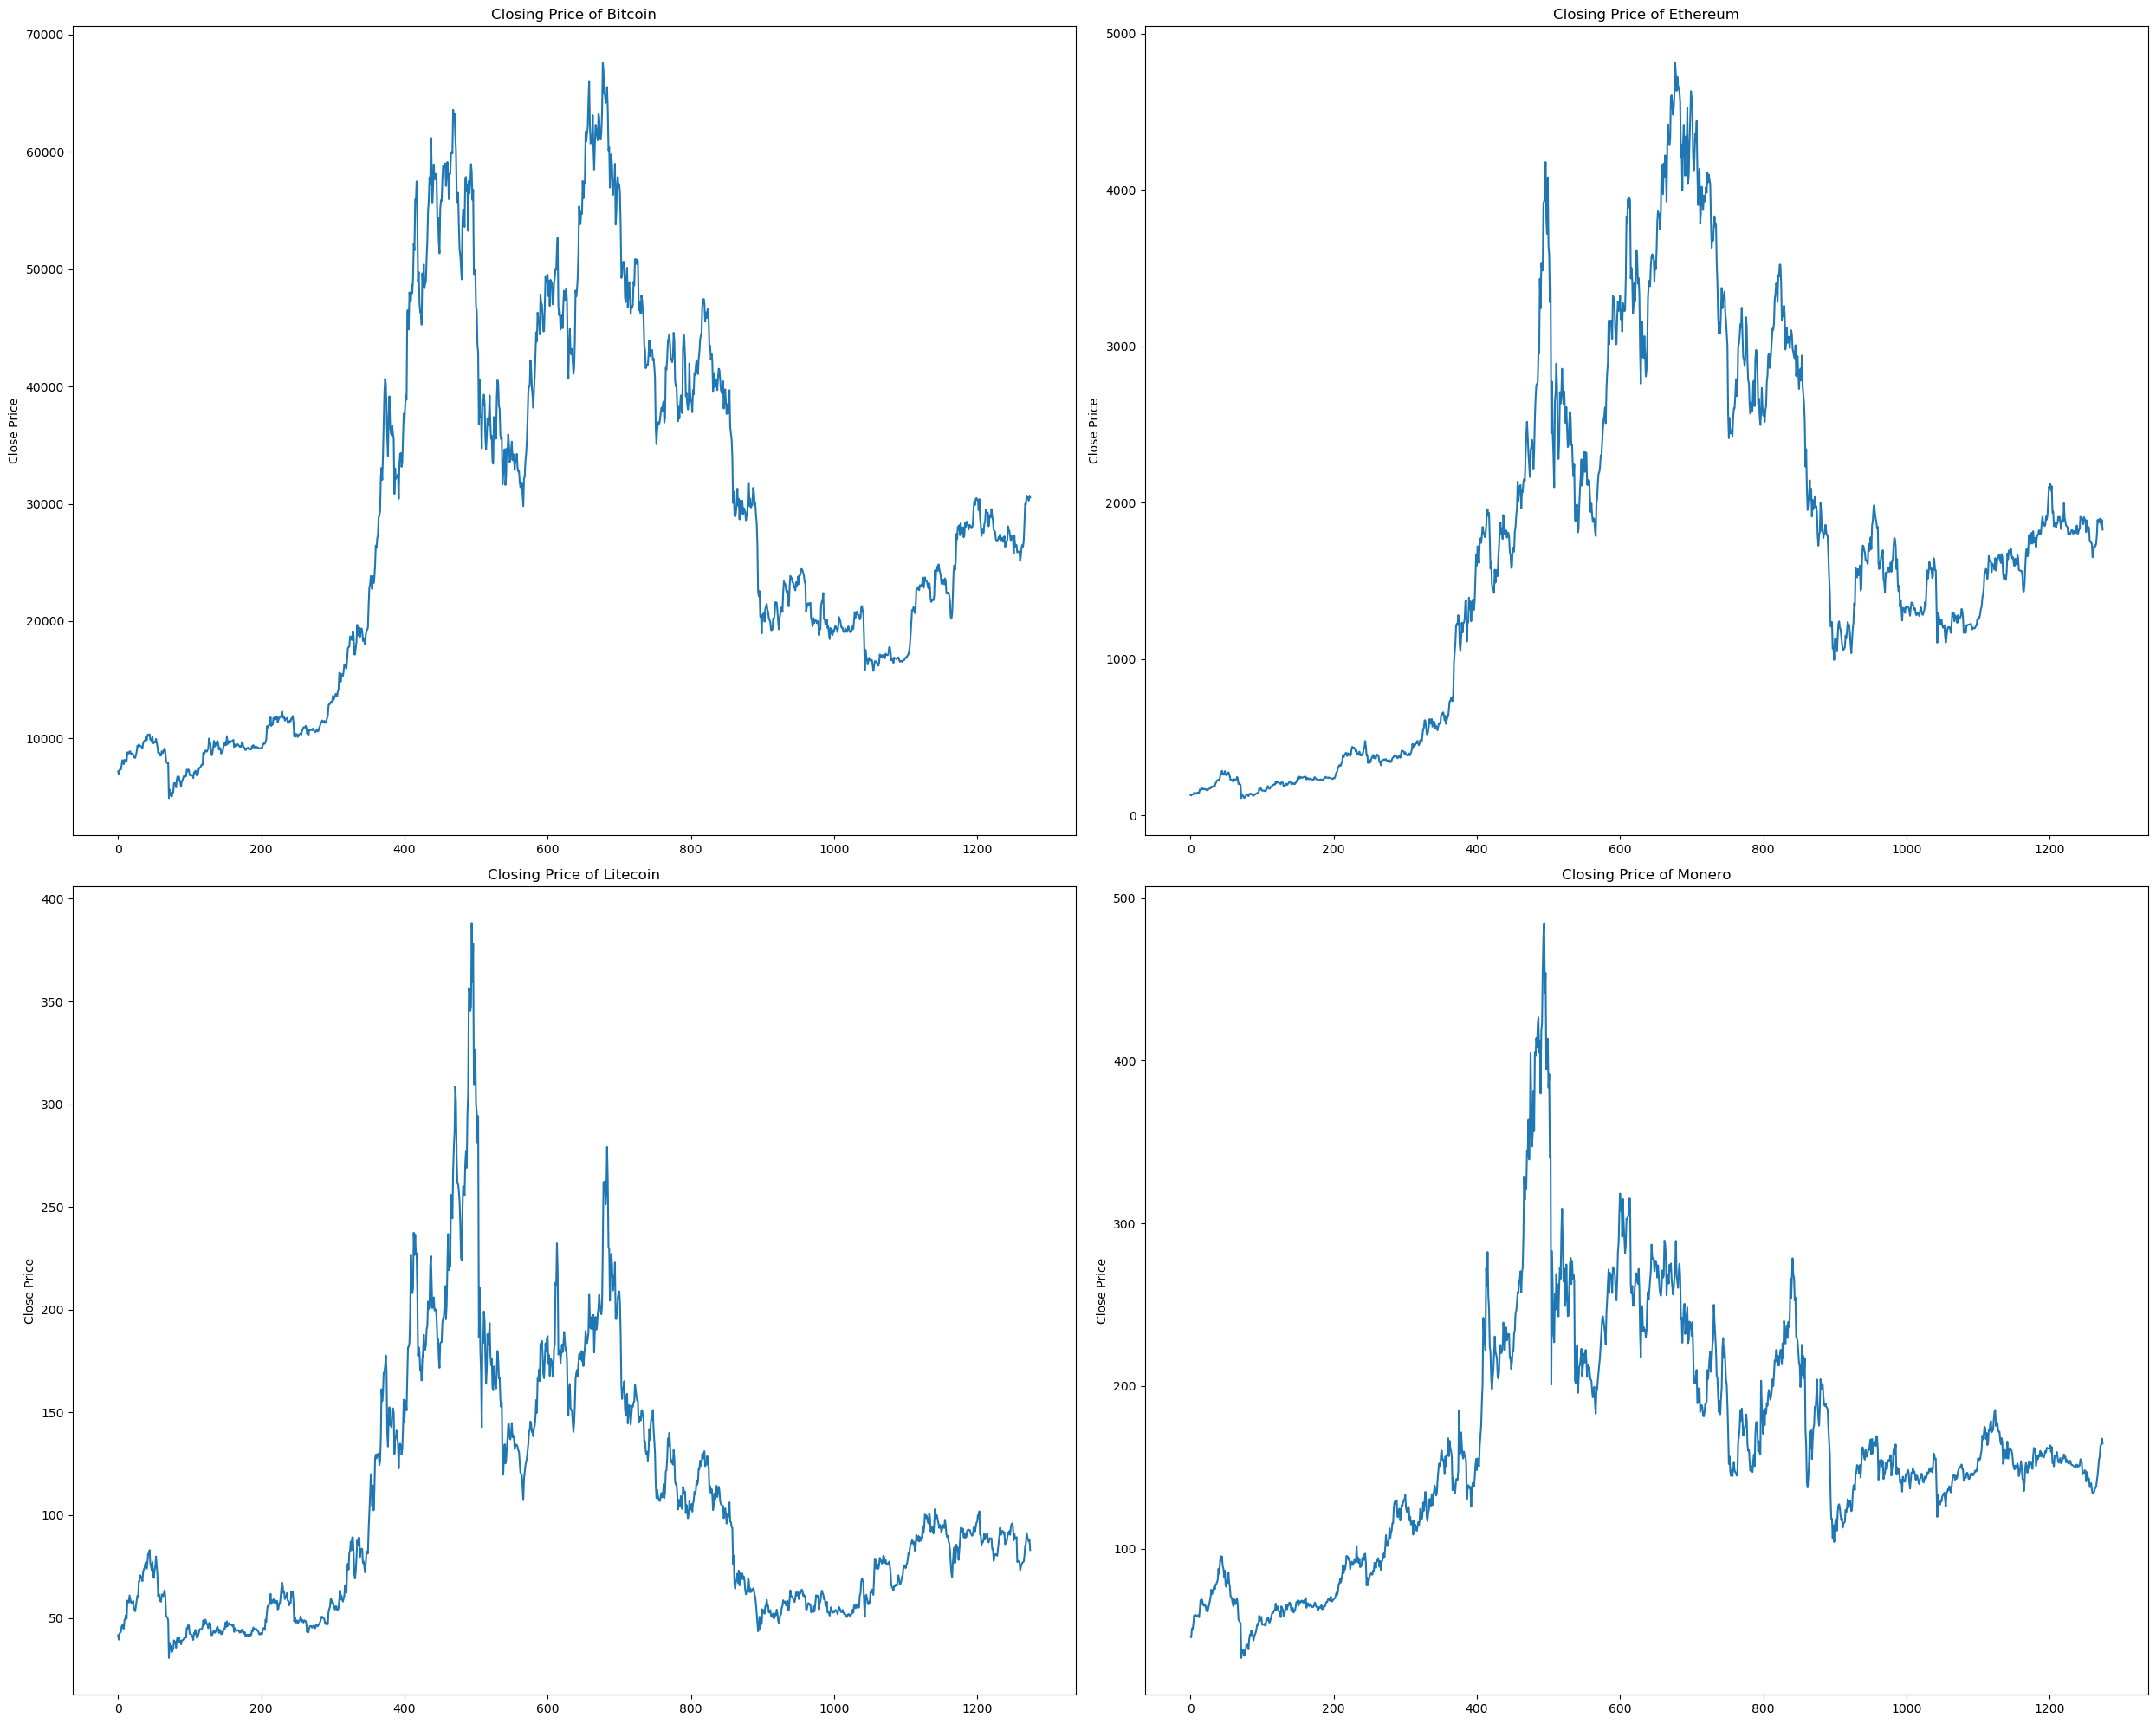

In [14]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(top=2, bottom=1.8)

for i, coin in enumerate(coin_list, 1):
    plt.subplot(2, 2, i)
    coin['close'].plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {coin_name[i - 1]}")
   
plt.tight_layout()

Historical Sales Volume


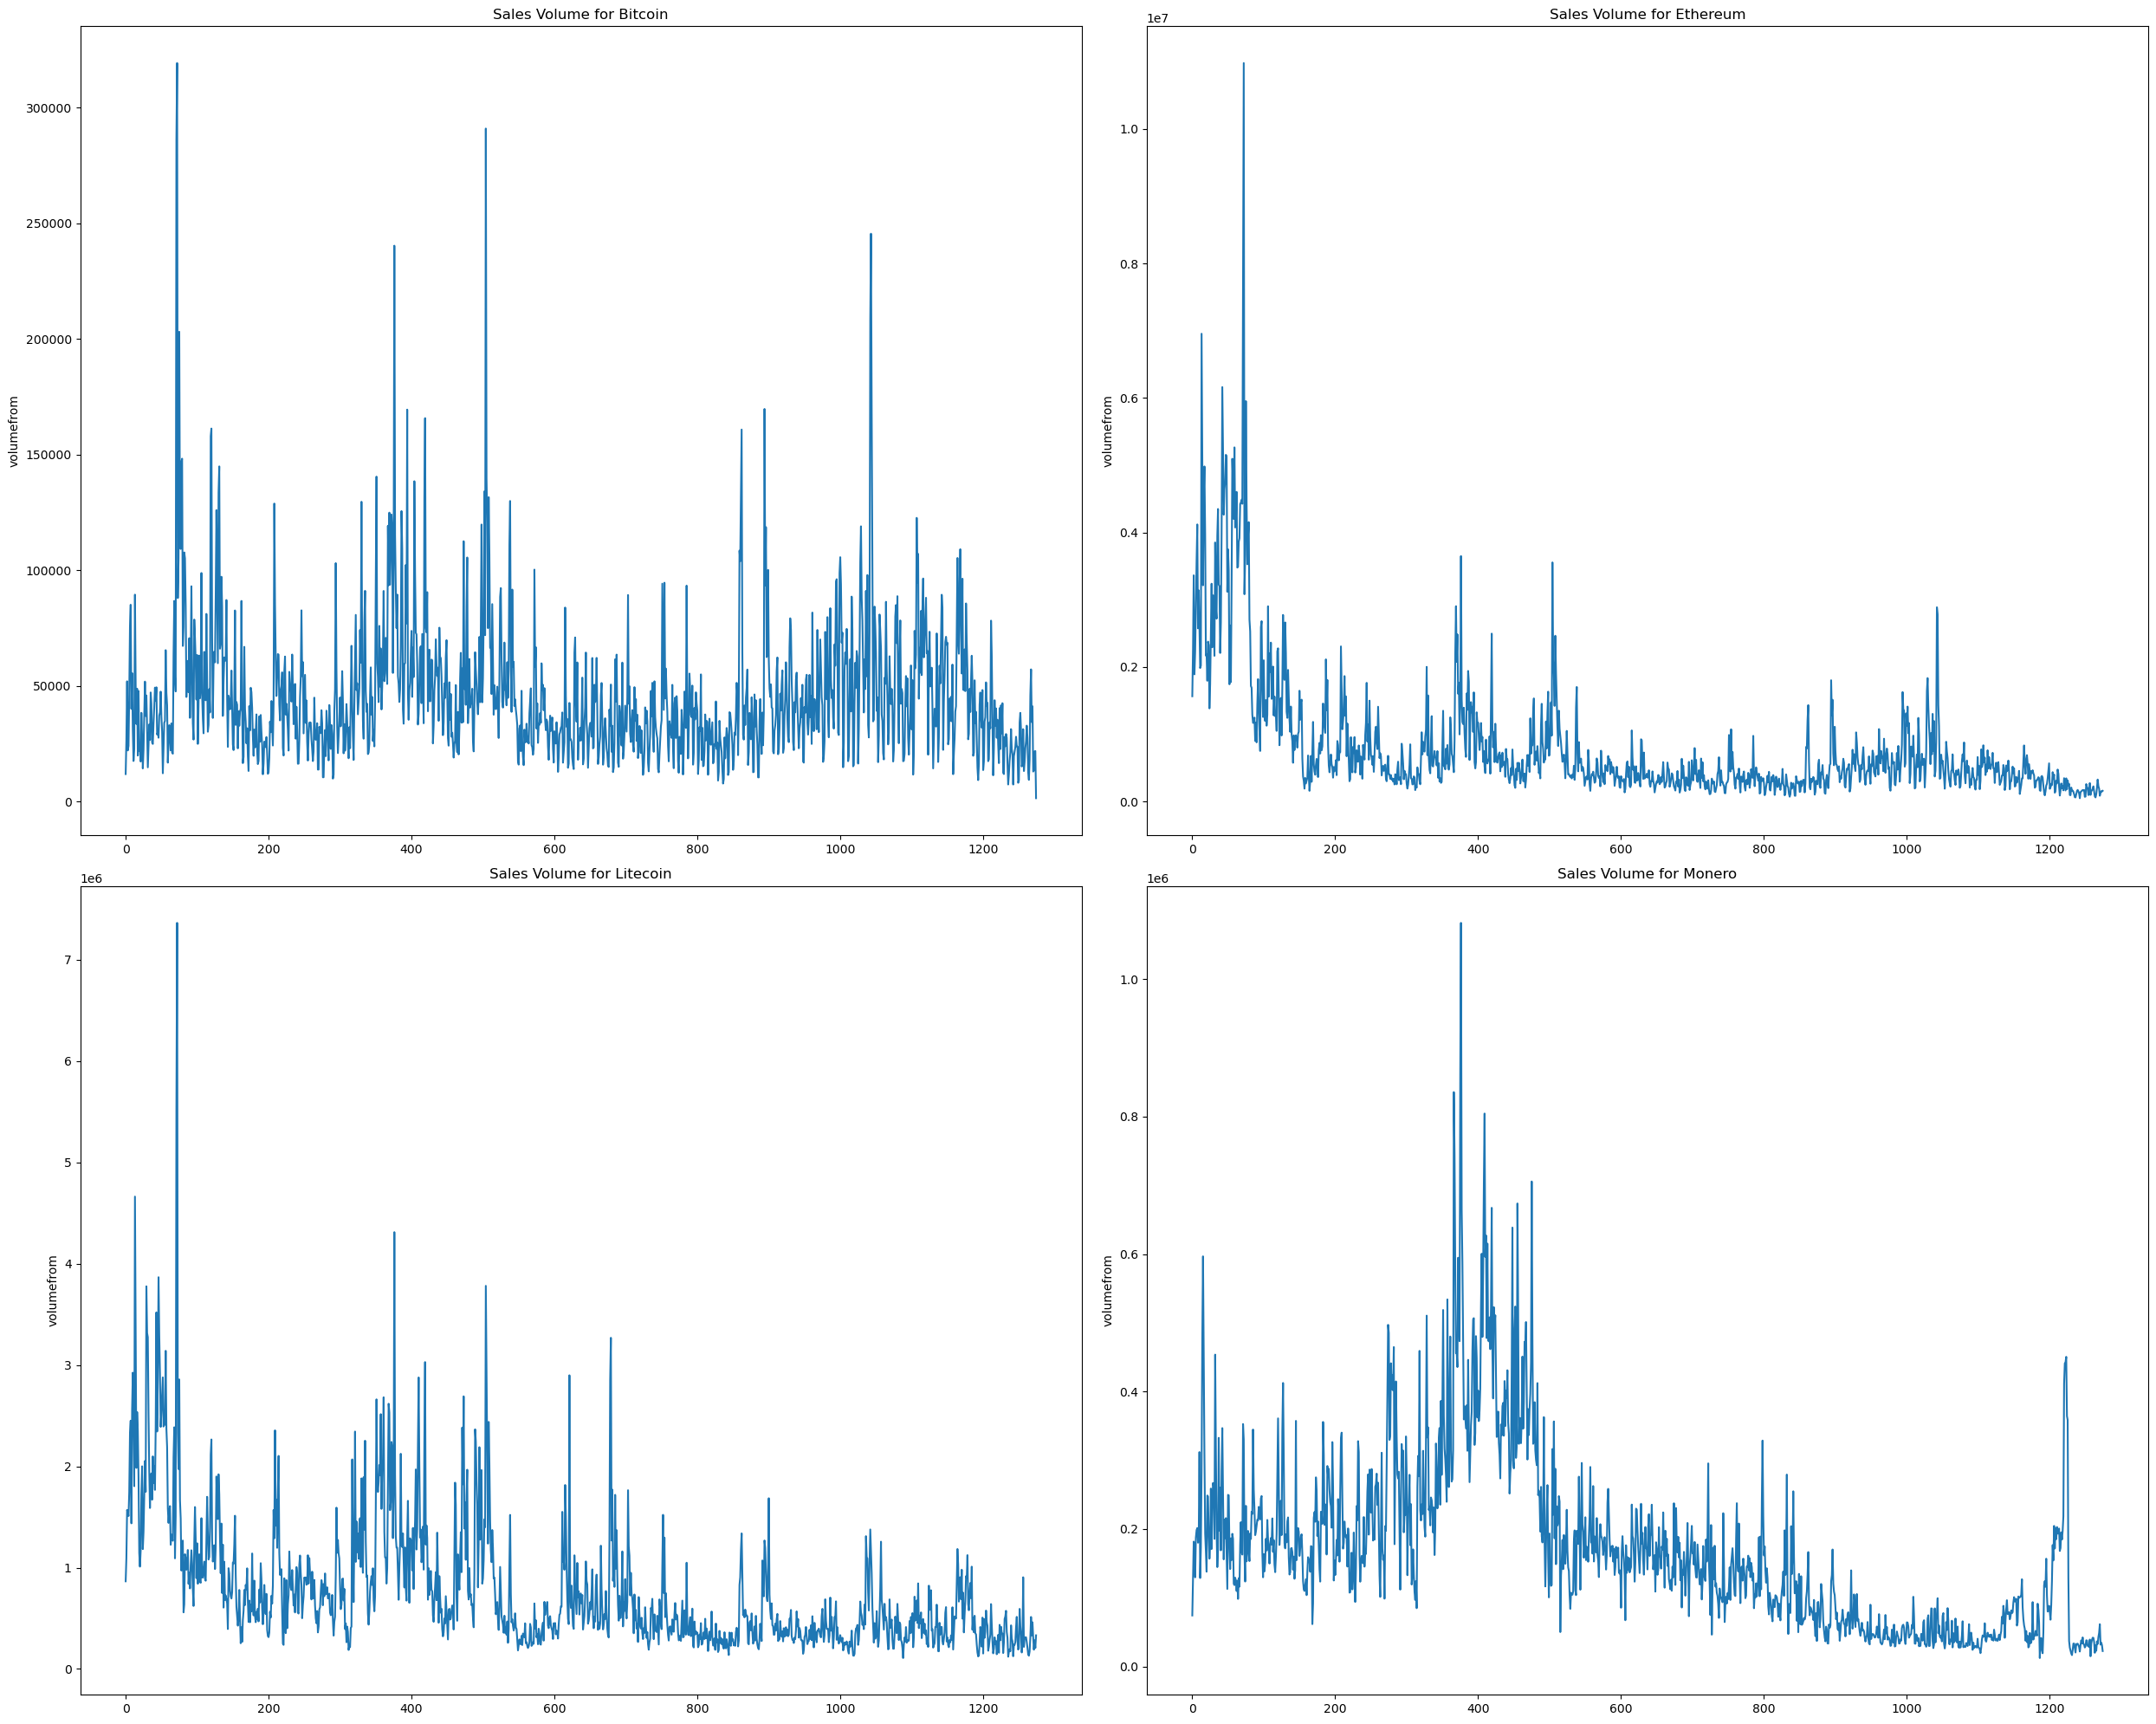

In [15]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(top=2, bottom=1.8)

for i, coin in enumerate(coin_list, 1):
    plt.subplot(2, 2, i)
    coin['volumefrom'].plot()
    plt.ylabel('volumefrom')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {coin_name[i - 1]}")
    
plt.tight_layout()

Moving Average

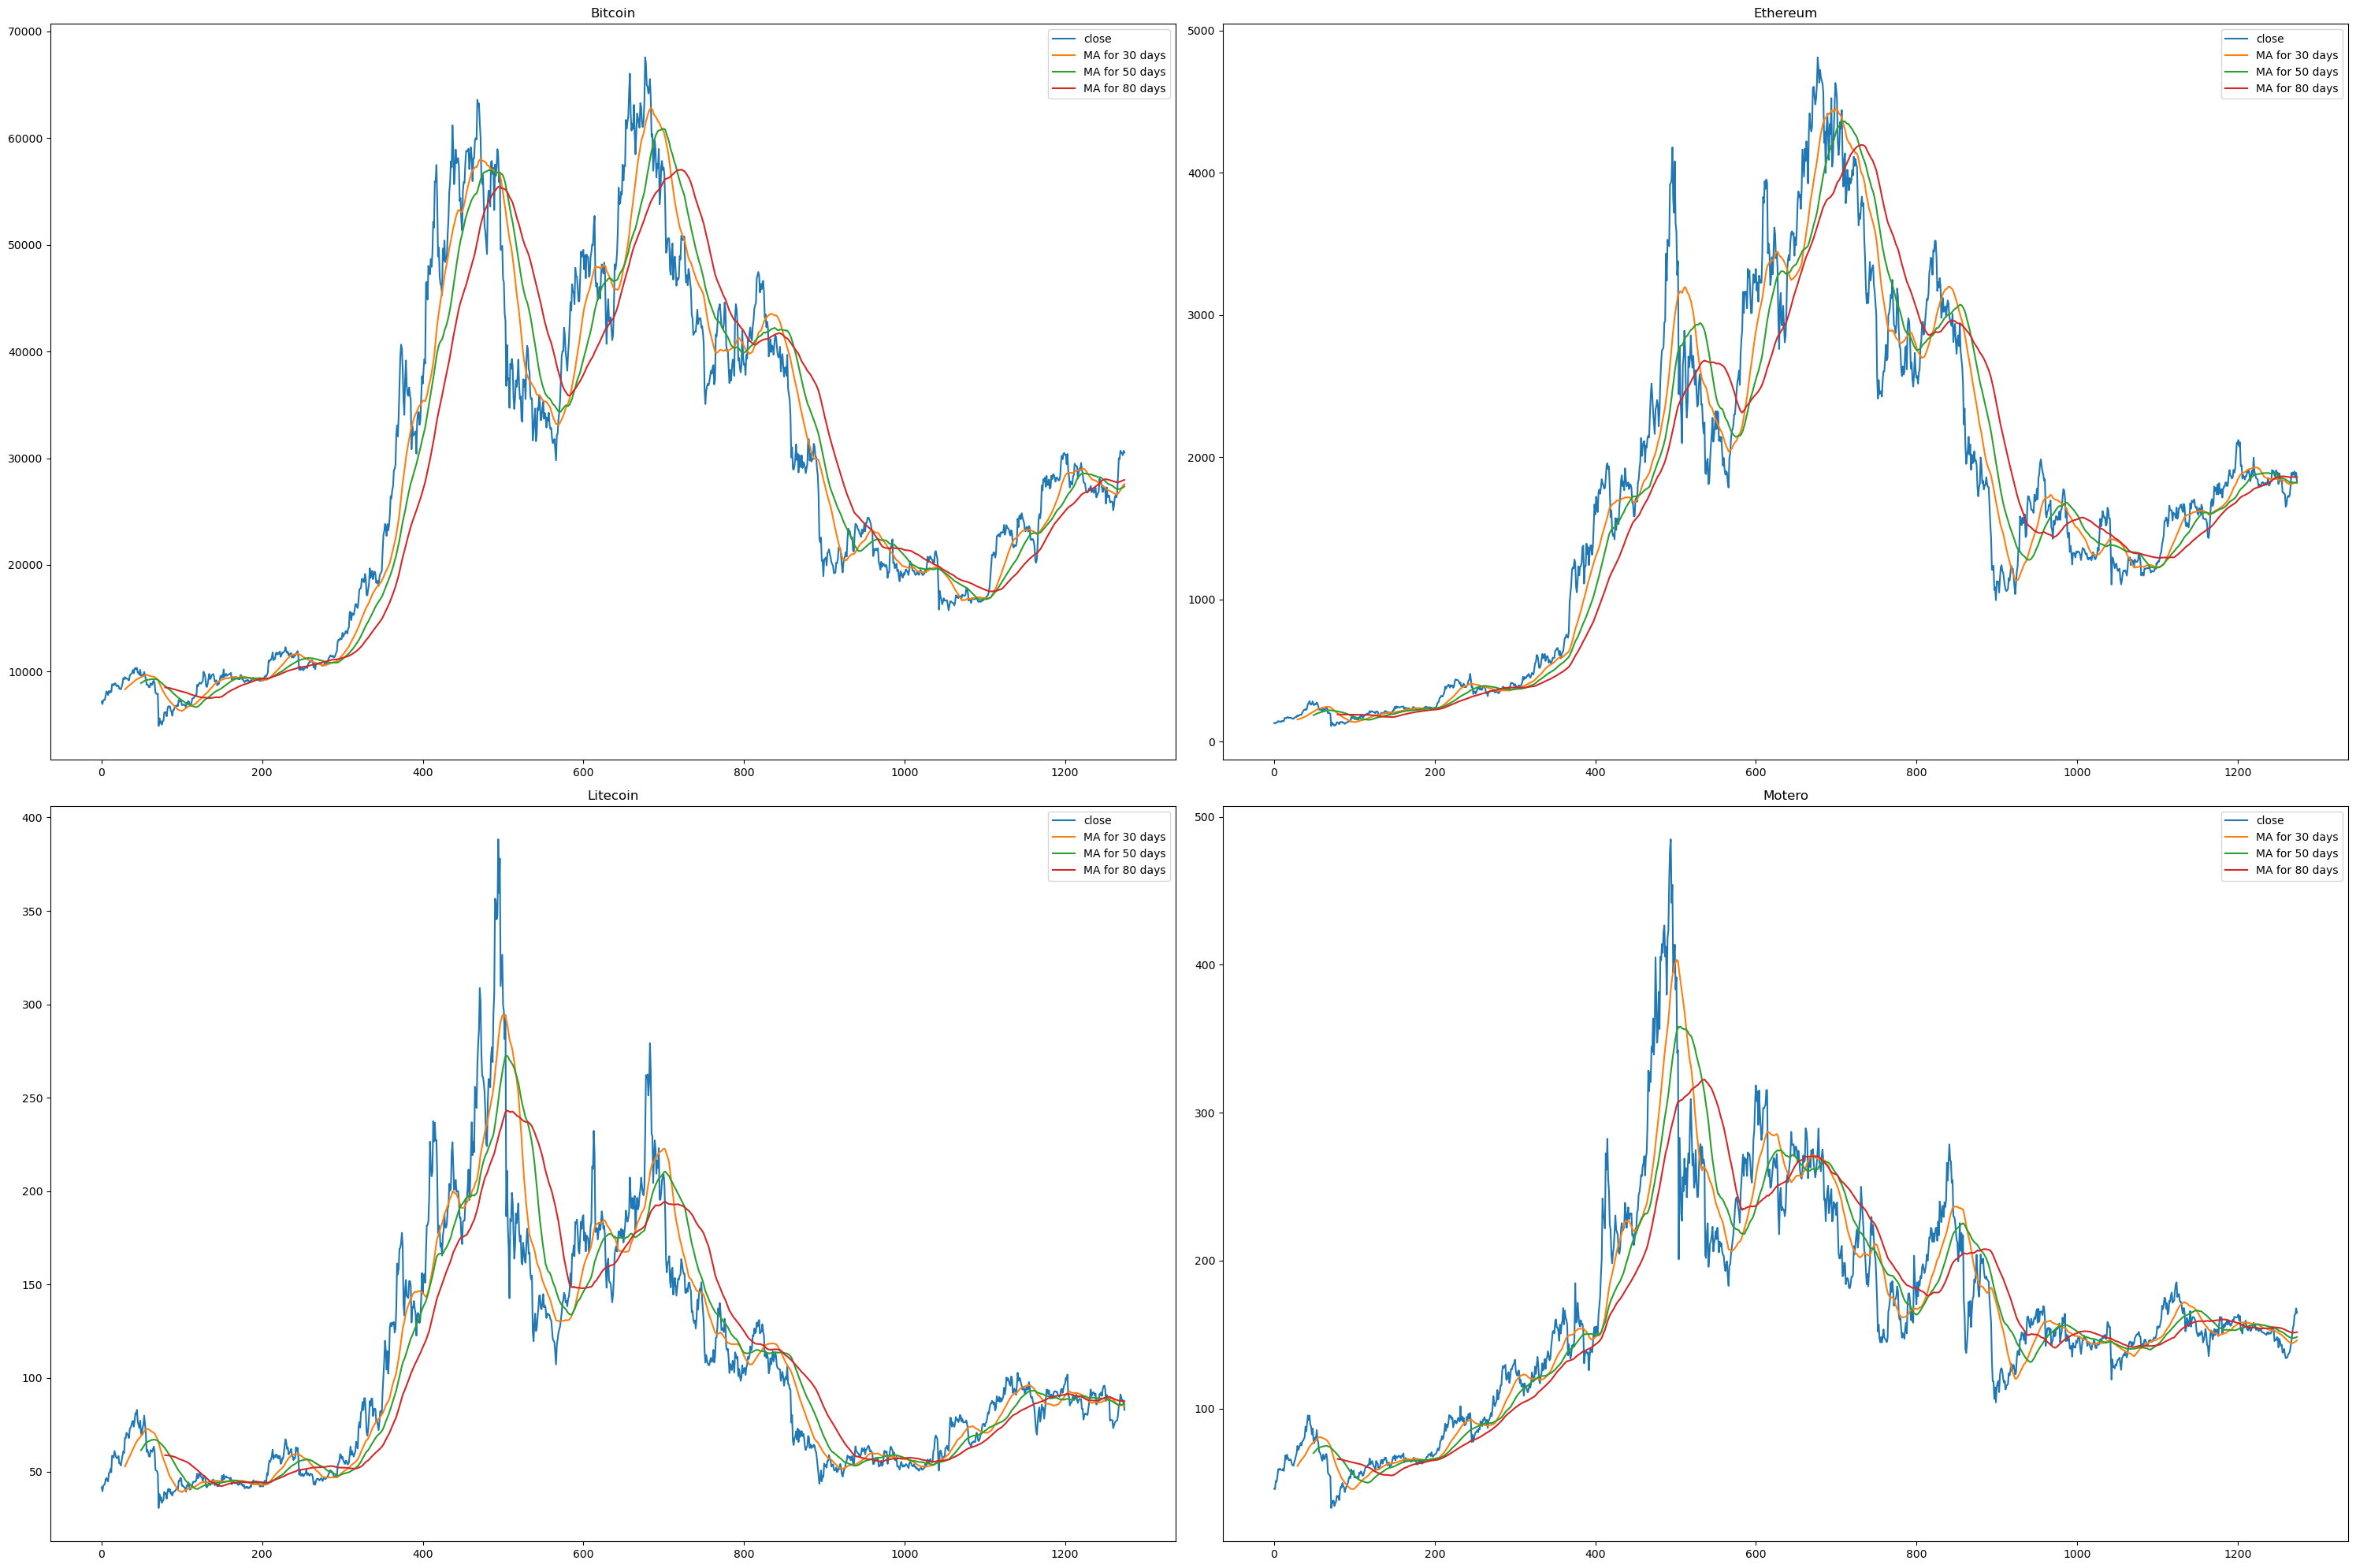

In [18]:
ma_day = [30, 50, 80]

for ma in ma_day:
    for coin in coin_list:
        column_name = f"MA for {ma} days"
        coin[column_name] = coin['close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

df_BTC[['close', 'MA for 30 days', 'MA for 50 days', 'MA for 80 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Bitcoin')

df_ETH[['close', 'MA for 30 days', 'MA for 50 days', 'MA for 80 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Ethereum')

df_LTC[['close', 'MA for 30 days', 'MA for 50 days', 'MA for 80 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Litecoin')

df_XMR[['close', 'MA for 30 days', 'MA for 50 days', 'MA for 80 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Motero')

fig.tight_layout()
        


In [19]:
def get_correlation(dataframes):
  """
  Get the correlation of the 'close' column in the four dataframes.

  Args:
    dataframes: A list of four dataframes.

  Returns:
    A numpy array of the correlation coefficients.
  """

  close_columns = [df['close'] for df in dataframes]
  correlations = np.corrcoef(close_columns)
  return correlations

In [20]:
correlations = get_correlation([df_BTC, df_ETH, df_LTC, df_XMR])
print(correlations)

[[1.         0.89144841 0.89502651 0.88051112]
 [0.89144841 1.         0.73787369 0.82302496]
 [0.89502651 0.73787369 1.         0.88894995]
 [0.88051112 0.82302496 0.88894995 1.        ]]


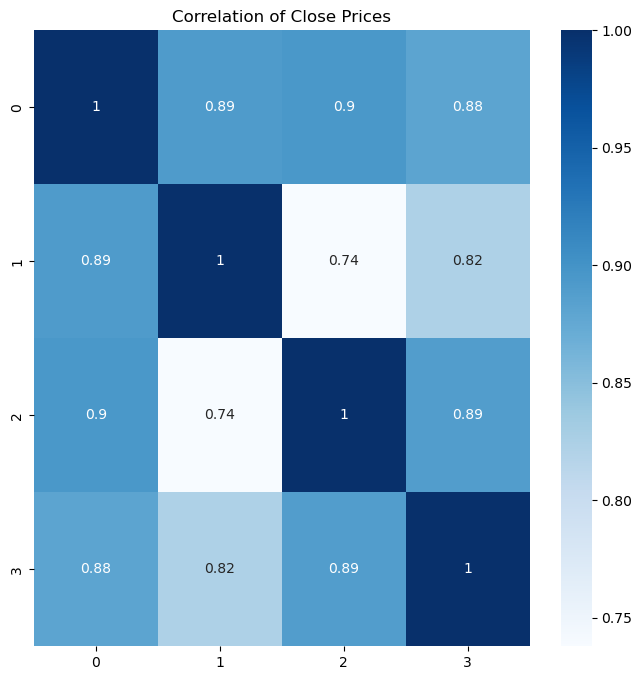

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.title('Correlation of Close Prices')
plt.show()

In [64]:
s1 = pd.Series(df_BTC['close'],name='Bitcoin')
s2 = pd.Series(df_ETH['close'],name='Ethereum')
s3 = pd.Series(df_LTC['close'],name='Litcoin')
s4 = pd.Series(df_XMR['close'],name='Monero')
close_cols = pd.concat([s1,s2,s3,s4], axis=1)
close_cols


,Bitcoin,Ethereum,Litcoin,Monero
0,7189.94,130.57,41.59,45.78
1,6965.72,127.05,39.45,45.51
2,7339.70,134.24,42.36,50.97
3,7357.50,134.20,42.82,50.37
4,7359.96,135.50,43.32,53.70
...,...,...,...,...
1270,30548.03,1875.93,89.75,156.71
1271,30473.33,1899.46,88.26,163.37
1272,30274.61,1859.19,87.22,163.82
1273,30698.21,1889.74,88.08,167.70


In [65]:
tech_rets = close_cols.pct_change()
tech_rets.head()

,Bitcoin,Ethereum,Litcoin,Monero
0,NaN,NaN,NaN,NaN
1,-0.031185,-0.026959,-0.051455,-0.005898
2,0.053689,0.056592,0.073764,0.119974
3,0.002425,-0.000298,0.010859,-0.011772
4,0.000334,0.009687,0.011677,0.066111


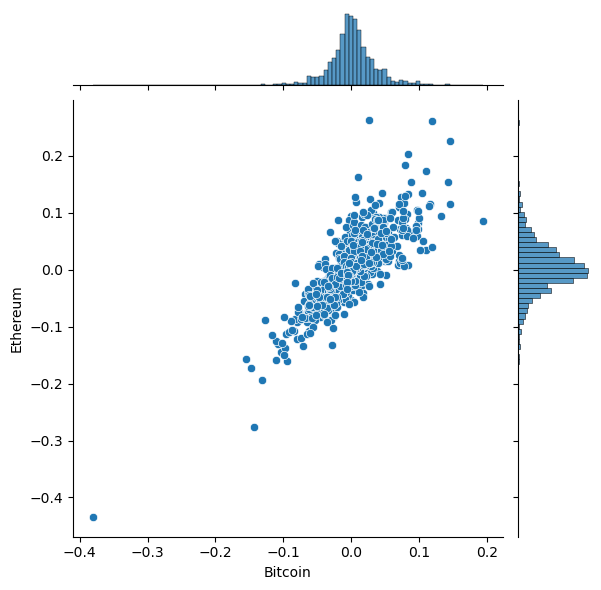

In [66]:
# We'll use joinplot to compare the daily returns of Bitcoin and Ethereum
sns.jointplot(x='Bitcoin', y='Ethereum', data=tech_rets, kind='scatter')

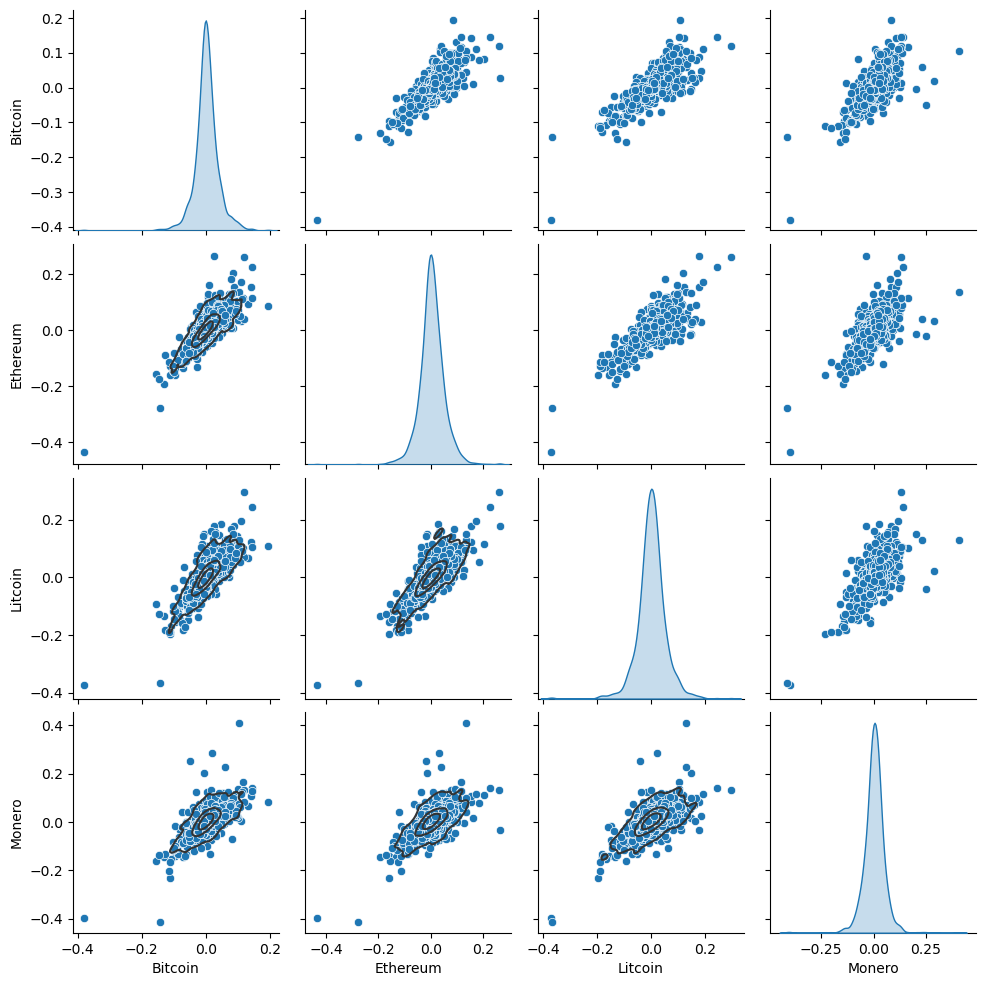

In [69]:
g = sns.pairplot(tech_rets, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")